<a href="https://colab.research.google.com/github/mafaldasalomao/paciv_treinamento_ml/blob/main/PAVIC_ML_00_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

In [ ]:
#Algoritimo perceptron

# Inicializar o 'w' e o 'b'
# Para cada amostra
  # calcular o y_pred = f(E xi*wi + b)onde f é  função de ativação step, para regressão trocamos para linear
  # calcular o erro erro = y - y_pred
  # atualizar os pesos wi = wi + lambda * erro * xi
  # atualizar o bias bi = bi + lambda*erro
# repetir até encontrar o menor erro

# Classificação

## Porta OR ou AND

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


In [ ]:
D = x.shape[1] # qtd entradas
w = 2*np.random.random(D)-1 #inicalizar pesos random
b = 2*np.random.random()-1 # inicializar bias random
w, b

(array([1.91493732, 1.91266439]), -0.9598145986073805)

In [ ]:

for step in range(100):
  learning_rate = 1.0
  cost = 0
  for x_n, y_n in zip (x, y):
    y_pred = np.dot(x_n, w) + b
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y_n - y_pred
    w = w + learning_rate*np.dot(error, x_n)
    b = b + learning_rate*error
    cost += error**2 # o perceptron nao necessita do custo
  if step % 10 ==0:
    print("step {0}: {1}".format(step, cost))
print('w', w)
print('b', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: 1
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
w [1.91493732 0.91266439]
b -1.9598145986073805
y_pred: [-1.9598146  -1.04715021 -0.04487728  0.86778711]


In [ ]:
#podemos aplicar esses pesos no notebook de intuição

## Exercício de Classificação


(100, 2) (100,)


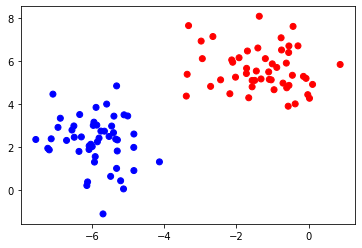

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [ ]:
D = x.shape[1] # qtd entradas
w = 2*np.random.random(D)-1 #inicalizar pesos random
b = 2*np.random.random()-1 # inicializar bias random
w, b

(array([0.59352434, 0.38477992]), -0.4444324569496694)

In [ ]:

for step in range(100):
  learning_rate = 1.0
  cost = 0
  for x_n, y_n in zip (x, y):
    y_pred = np.dot(x_n, w) + b
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y_n - y_pred
    w = w + learning_rate*np.dot(error, x_n)
    b = b + learning_rate*error
    cost += error**2 # o perceptron nao necessita do custo
  if step % 10 ==0:
    print("step {0}: {1}".format(step, cost))
print('w', w)
print('b', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: 4
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
w [13.62719467 12.85259772]
b 0.5555675430503306
y_pred: [ 56.01809003 -23.70978037 -65.11786586  85.68308047  60.42166193
 -54.00869916  51.73038641 -24.41204347  46.87876397  42.83862062
 -32.16596176  23.71026547 -66.31084683 -39.06969038 -55.41639503
 -63.32303526  62.9208772   75.11645953 -40.1857574   49.14743905
 -73.27694705  53.23687505  57.15756855  47.35038521 -42.38170581
  48.86949921 -50.61362343  67.90101215  48.12525799  54.69032991
  28.22594808  40.79660869 -66.27823721 -53.21512007 -61.46036719
  53.32798907  62.65185284  32.96192039 -24.55546739 -41.60129065
 -73.65249185 -59.25244898 -54.57988833  62.14375593 -60.28470694
  55.58041836  33.03701326  49.74736253 -41.92977447  82.61536738
  55.97274263 -56.65593506 -78.30696342 -39.14497371 -50.54787881
  79.13640416  66.43830623  92.39398618  53.28745533  66.16776428
  65.09438819  -9.93090542  25.33779061  4

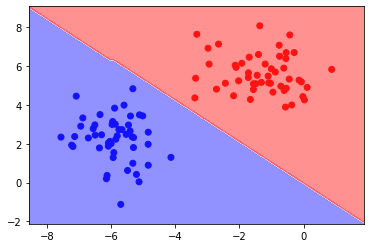

In [ ]:
plot_linear_classifier(x, y, w, b)

# Perceptron Regressão linear

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [ ]:
df = pd.read_csv('/content/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

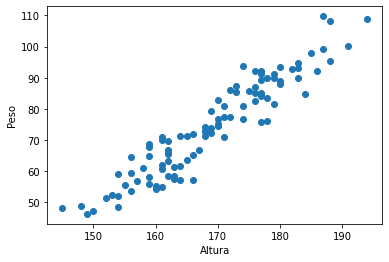

In [ ]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
print(x.shape, y.shape)

(100,) (100,)


In [ ]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100,)


In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 
lr =1.0 #
for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
        #y_pred = np.where(y_pred > 0, 1, 0) #removemos essa linha
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n) # alteramos o LR 1.0 -> 1e-7
        b = b + 1e-2*error # 1e-2 
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 873656.4810071263
step 1000: 7796.841529792986
step 2000: 3524.759148626922
step 3000: 2779.285669023241
step 4000: 2650.880212364023
step 5000: 2629.473753731182
step 6000: 2626.210120669379
step 7000: 2625.8477644971667
step 8000: 2625.873075286892
step 9000: 2625.914932322758
step 10000: 2625.9379980440613
w:  [1.36971333]
b:  -157.86701234911533


In [ ]:
# os dados nao estao normalizados peso em kg e altura em m
# vamos normalizar
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


Text(0, 0.5, 'Peso')

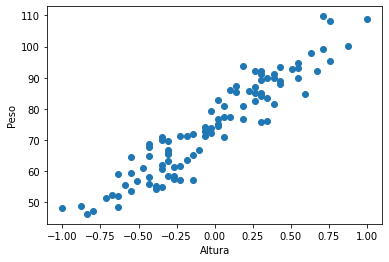

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102


In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1e-3 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 515044.14804088575
step 100: 3119.0007806870444
step 200: 2623.3088288976687
step 300: 2611.5325881511426
step 400: 2611.2514778685554
step 500: 2611.2445666714407
step 600: 2611.2443659848573
step 700: 2611.2443555790314
step 800: 2611.244354462775
step 900: 2611.2443543023332
step 1000: 2611.2443542778938
w:  [33.60180845]
b:  74.93896426887831


In [ ]:
def plot_line(w, b):
    plt.figure(0, figsize=(8,8))
    plt.subplot(1,1,1)
    plt.scatter(x, y)
    y_pred = x*w + b
    plt.plot(x, y_pred, c='red')
    plt.xlim(140, 210)
    plt.ylim(40, 120)
    
    plt.subplot(1,1,1)
    x_ = np.array([0, x.max()])
    y_ = x_*w + b
    plt.scatter(x, y)
    plt.plot(x_, y_, c='red')
    plt.xlim(0, 1)
    plt.ylim(-160, 120)
    
    plt.show()

<ipython-input-80-6e682e5b601f>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


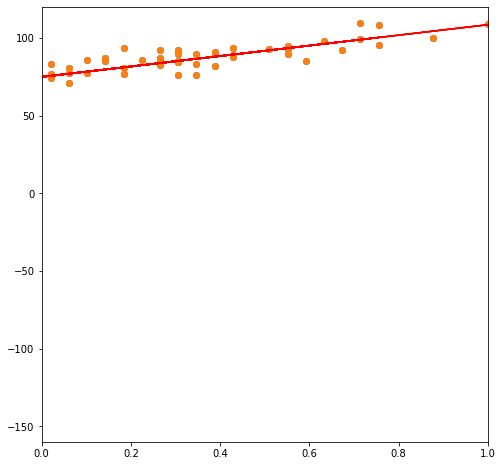

In [ ]:
plot_line(w, b)

## Exercício

In [ ]:
df = pd.read_csv('/content/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

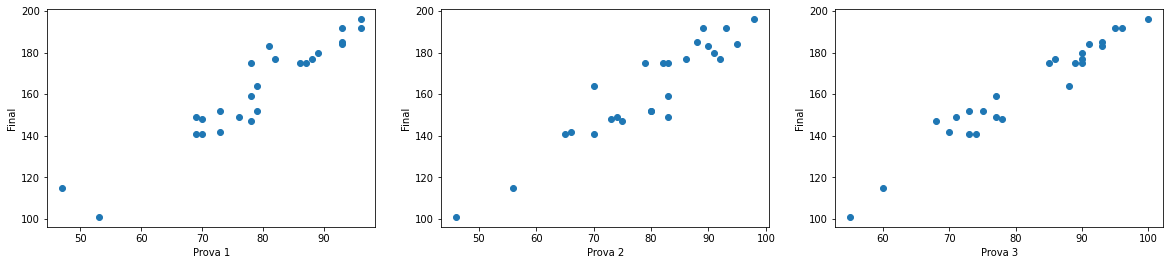

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [ ]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 147174.16064492773
w:  [ -1.30175939 -48.55589844 -22.6817323 ]
b:  47.86576923088782
